# strength surface

template script to generate strength surface of various type
and plot 2d and 3d strength surface from data (and save contours)

Saved to: ../data/strength//ss_pmma_DRUCKER_props[3.08, 9.24]_srange[-100, 100, 201].npy


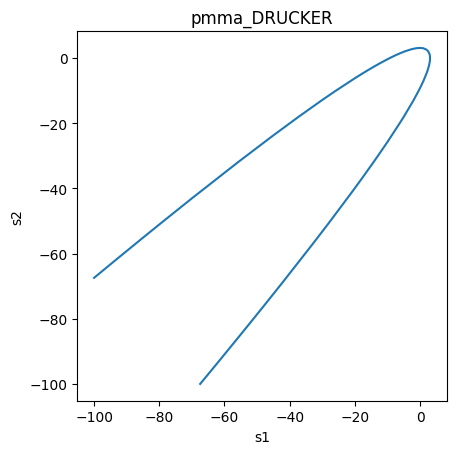

In [6]:
import os
import glob
from cm_vis.strength.gen import StrengthSurface

## clear data first
files = glob.glob("../data/strength/*")
for f in files:
    os.remove(f)

mname = "pmma"
stype = "DRUCKER"
sigma_ts = 3.08
sigma_cs = 9.24
props = [sigma_ts, sigma_cs]
srange = [-100, 100, 201]
data_dir = "../data/strength/"

surface = StrengthSurface(mname, stype, props, srange)
surface.gen(data_dir=data_dir)

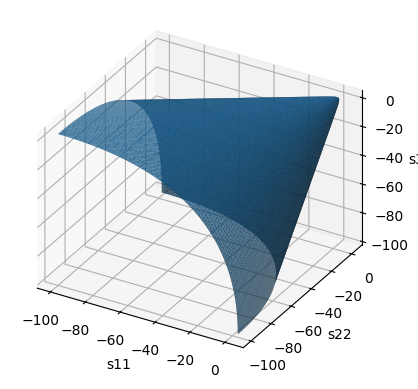

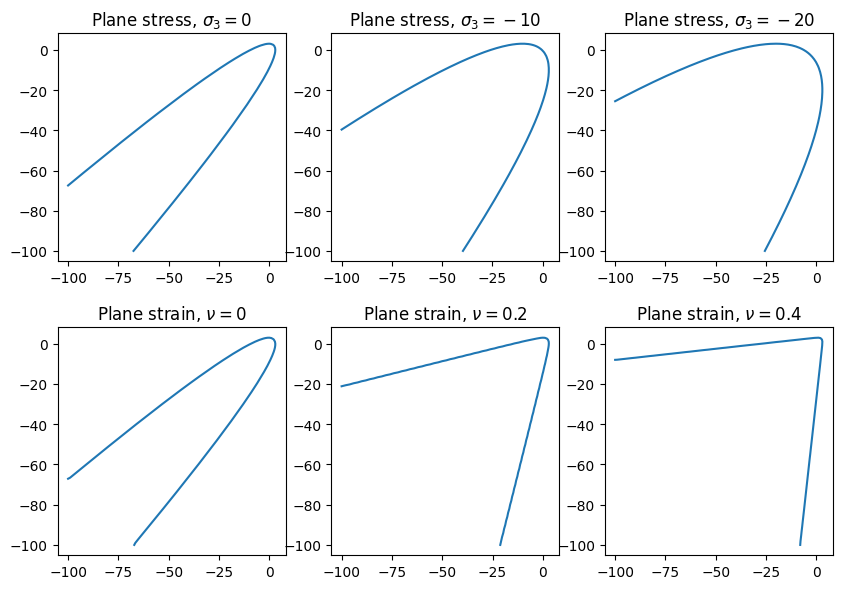

In [11]:
# %% 3D, 2D plane stress, and 2D plane strain
import glob
import matplotlib.pyplot as plt
from cm_vis.strength.plot import SurfacePlotter

data_dir = "../data/strength/"
ss = glob.glob(data_dir + "*drucker*.npy")

plotter = SurfacePlotter(ss[0])
ax = plotter.plot()

# plane stress vs. plane strain
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
# plt.style.use("elsevier")

s3 = [0, -10, -20]
for i in range(3):
    plotter.plot(option="plane_stress", s3=s3[i], ax=axs[0][i])
    axs[0][i].set_title(f"Plane stress, $\\sigma_3={s3[i]}$")

nu = [0, 0.2, 0.4]
for i in range(3):
    plotter.plot(option="plane_strain", nu=nu[i], ax=axs[1][i])
    axs[1][i].set_title(f"Plane strain, $\\nu={nu[i]}$")

for ax in axs.flatten():
    ax.set(aspect="equal")